In [1]:
from function import *
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.pyplot import subplots

In [2]:
data = pd.read_pickle('/home/jinzhuo/ww_dataset/SCMS/aplysia_ganglia/Aplysia_Data.pkl')
sample_info = pd.read_pickle('/home/jinzhuo/ww_dataset/SCMS/aplysia_ganglia/Aplysia_SampleInfo.pkl')
feature_info = pd.read_pickle('/home/jinzhuo/ww_dataset/SCMS/aplysia_ganglia/Aplysia_Features.pkl')
data['type'] = sample_info['types']
types = list({t for t in data['type']})
types = sorted(types)

In [10]:
data.columns

Index([ 900.4501,  901.4606,  902.5134,  908.4551,  909.4062,  911.3556,
        918.5083,  919.4745,  921.4868,  925.4817,
       ...
       4938.4268, 4939.4585, 5056.1938, 5146.4321, 5151.4282, 5233.7378,
       5249.7329, 5406.5254, 5425.8384,    'type'],
      dtype='object', length=543)

In [11]:
total = 0
for j in range(len(types)):
    print(types[j])
    print(np.array(list(data['type'] == types[j])).sum())
    total = total + np.array(list(data['type'] == types[j])).sum()
print(total)
    

Abdom
4695
Bag
2665
Buccal
3841
Cere
5212
Pedal
12106
Pleural
3874
32393


In [14]:
import joblib
model = joblib.load('/home/jinzhuo/ww_dataset/DECOMPOSITION/model_save_file/xgboost_model.pkl')
import shap
from shap import TreeExplainer
shap_explainer = TreeExplainer(model)
shap_values = shap_explainer.shap_values(data.drop(['type'],axis =1))
features = data.columns[:-1]

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [16]:
shap_index = shap_index_out(20,np.array(shap_values))
print(len(shap_index))

46


In [17]:
cell_type_ref,data_matrix_list_train= cell_type_ref_train(data,types,1000,2000,shap_index)

(4695, 46) Abdom
(1000, 46) Abdom
(2665, 46) Bag
(1000, 46) Bag
(3841, 46) Buccal
(1000, 46) Buccal
(5212, 46) Cere
(1000, 46) Cere
(12106, 46) Pedal
(1000, 46) Pedal
(3874, 46) Pleural
(1000, 46) Pleural


In [21]:
ratio,norm_ratio = ratio_num_generate(100*2,[1,3],6)
ratio[5] = 20
print(ratio)

[0, 112, 0, 88, 0, 20]


In [65]:
num_cell = 3
def train(init_choice ,clip_choice ,lossfunc_name,sample_list,celltypechoice,norm_method_name):
    for j in range(200):
        ratio,norm_ratio = ratio_num_generate(100*3,celltypechoice,6)
        ratio[3] = 150
        # MixSample = MixDataset(data_matrix_list_train,ratio)
        MixSample = MixDataset(data_matrix_list_train,1,ratio)
        target = MixSample.reshape(1,-1)
        target = torch.from_numpy(target).float()
        target = norm_method(norm_method_name,target)
        predict = linear_deconvolution(num_cell,target,torch.from_numpy(cell_type_ref[celltypechoice,:]).float(),init_choice = init_choice,clip_choice=clip_choice,lossfunc_name = lossfunc_name,norm_method_name = norm_method_name )
        print(lossfunc_name,j,predict,norm_ratio,ratio)
        sample_list.append([predict,norm_ratio,ratio])
    return sample_list
combo = [1,2,5]
sample_listmse = []
sample_listmse = train(init_choice = True ,clip_choice=True ,lossfunc_name='mse',sample_list=sample_listmse,celltypechoice = combo,norm_method_name = 'z_score')

mse 0 tensor([[0.3546, 0.2799, 0.3656]], grad_fn=<DivBackward0>) [0.35333333333333333, 0.22333333333333333, 0.42333333333333334] [0, 106, 67, 150, 0, 127]
mse 1 tensor([[0.1670, 0.7560, 0.0770]], grad_fn=<DivBackward0>) [0.15, 0.7433333333333333, 0.10666666666666667] [0, 45, 223, 150, 0, 32]
mse 2 tensor([[0.1110, 0.1409, 0.7481]], grad_fn=<DivBackward0>) [0.13, 0.19666666666666666, 0.6733333333333333] [0, 39, 59, 150, 0, 202]
mse 3 tensor([[0.1813, 0.0000, 0.8187]], grad_fn=<DivBackward0>) [0.25333333333333335, 0.12, 0.6266666666666667] [0, 76, 36, 150, 0, 188]
mse 4 tensor([[0.3242, 0.2579, 0.4178]], grad_fn=<DivBackward0>) [0.38, 0.24, 0.38] [0, 114, 72, 150, 0, 114]
mse 5 tensor([[0.5353, 0.3704, 0.0942]], grad_fn=<DivBackward0>) [0.47, 0.16, 0.37] [0, 141, 48, 150, 0, 111]
mse 6 tensor([[0.0469, 0.8508, 0.1024]], grad_fn=<DivBackward0>) [0.03666666666666667, 0.8866666666666667, 0.07666666666666666] [0, 11, 266, 150, 0, 23]
mse 7 tensor([[0.0952, 0.6349, 0.2698]], grad_fn=<DivBackw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


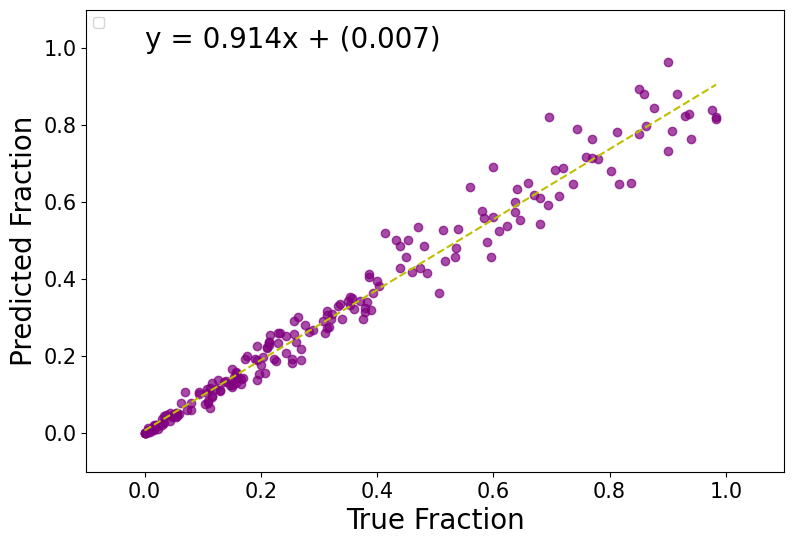

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


y = 0.914x + (0.007)
res_std = 0.0432
Pearson's r = 0.9857
Lin's ccc = 0.9796
RMSE = 0.0540


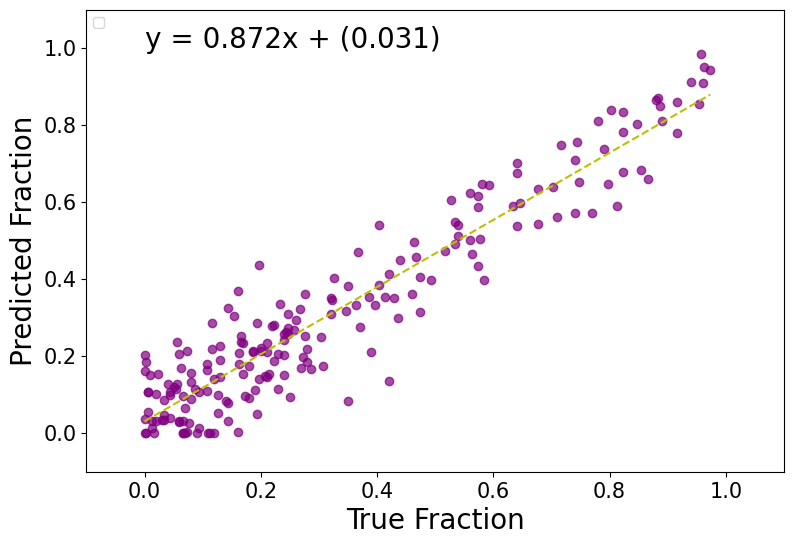

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


y = 0.872x + (0.031)
res_std = 0.0828
Pearson's r = 0.9463
Lin's ccc = 0.9423
RMSE = 0.0908


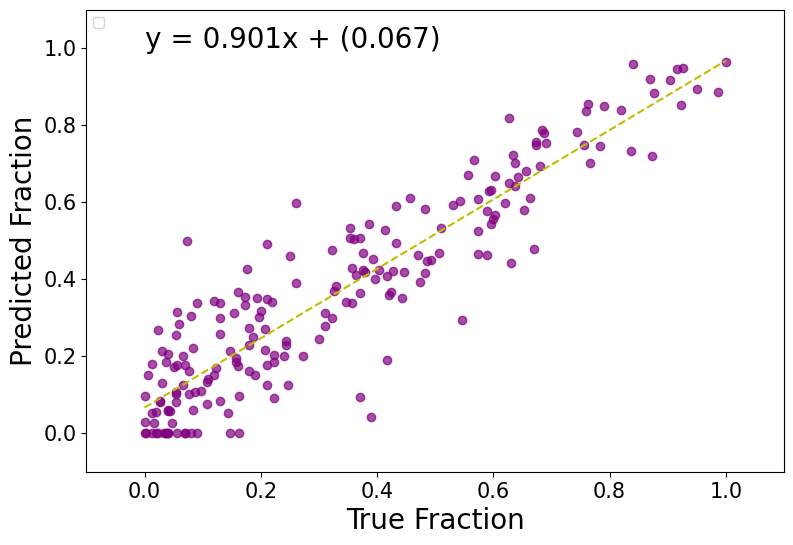

y = 0.901x + (0.067)
res_std = 0.1049
Pearson's r = 0.9170
Lin's ccc = 0.9096
RMSE = 0.1132


[[0.9135019240559398,
  0.007093000840151379,
  0.043239298286904315,
  0.9857244160661786,
  0.9796458780667102,
  0.05399202489073418],
 [0.8719091904341116,
  0.030842753334144376,
  0.08275567476844212,
  0.9463487834990596,
  0.9422859136692612,
  0.09084014621278083],
 [0.9009897419869486,
  0.06655736521550701,
  0.10492380281380877,
  0.9169666134421632,
  0.9096377753052578,
  0.11324217028947212]]

In [66]:
process_plot(sample_listmse,"aaa",save_choice = False,celltypenum = 3)

In [ ]:
num_cell = 4
def train(init_choice ,clip_choice ,lossfunc_name,sample_list,celltypechoice,norm_method_name):
    for j in range(200):
        ratio,norm_ratio = ratio_num_generate(50*2,celltypechoice,6)
        # MixSample = MixDataset(data_matrix_list_train,ratio)
        MixSample = MixDataset(data_matrix_list_train,3,ratio)
        target = MixSample.reshape(1,-1)
        target = torch.from_numpy(target).float()
        target = norm_method(norm_method_name,target)
        predict = linear_deconvolution(num_cell,target,torch.from_numpy(cell_type_ref[celltypechoice,:]).float(),init_choice = init_choice,clip_choice=clip_choice,lossfunc_name = lossfunc_name,norm_method_name = norm_method_name )
        print(lossfunc_name,j,predict,norm_ratio,ratio)
        sample_list.append([predict,norm_ratio,ratio])
    return sample_list

from itertools import combinations

# 从0到5的数字
numbers = list(range(6))

# 选择三个数字作为一个组合
combinations_list = list(combinations(numbers, num_cell))
sample_listmse_list = []
# 存储所有组合的列表
all_combinations = [list(combo) for combo in combinations_list]
for combo in all_combinations:
        sample_listmse = []
        sample_listmse = train(init_choice = True ,clip_choice=True ,lossfunc_name='mse',sample_list=sample_listmse,celltypechoice = combo,norm_method_name = 'z_score')
        sample_listmse_list.append(sample_listmse)
ppp = [sample_listmse_list]

ppp_name = [f'sample_listmae_{num_cell}']

for m,n in zip(ppp,ppp_name):
    with open(f'/home/jinzhuo/ww_dataset/DECOMPOSITION/temp-celltypenum/num{num_cell}/'+n+'.pkl', 'wb') as file:
        pickle.dump(m, file)

In [ ]:
from itertools import combinations
with open('/home/jinzhuo/ww_dataset/DECOMPOSITION/temp-celltypenum/num5/sample_listmae_5.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
labels = ['Abdom', 'Bag', 'Buccal', 'Cere', 'Pedal','Pleural']
cell1 = [[] for _ in range(6)]
# 从0到5的数字
numbers = list(range(6))
# 选择三个数字作为一个组合
combinations_list = list(combinations(numbers, 5))
# 存储所有组合的列表
all_combinations = [list(combo) for combo in combinations_list]
k = 0
for combo in all_combinations:
    temp_list = process_plot(loaded_data[k],labels[0],save_choice = False,celltypenum = 5)
    for i in range(5):
        cell1[combo[i]].append(temp_list[i])
    k = k+1

# cell1 = [[] for _ in range(6)]
# k = 0
# for m in range(0,6):
#     for n in range(m+1,6):
#         temp_list = process_plot(loaded_data[k],'sample_list_mse',save_choice = False,celltypenum = 2)
#         cell1[m].append(temp_list[0])
#         cell1[n].append(temp_list[1])
#         k=k+1



In [ ]:
import seaborn as sns
ttt = ["slope","intercept","RSD","Pearson's r","Lin's CCC","RMSE"]
n = 0
data = []
for m in range(0,6):
    data.append([x[n] for x in cell1[m]])
    labels = ['Abdom', 'Bag', 'Buccal', 'Cere', 'Pedal','Pleural']
sns.boxplot(data=data, palette="Set3")
plt.xticks(range(len(data)))
plt.title(ttt[n])
plt.xlabel("Cell type")
plt.ylabel("Data")
plt.savefig("/home/jinzhuo/ww_dataset/DECOMPOSITION/temp-celltypenum/num5/photosvg/"+"num5"+ttt[n]+".svg",format = 'svg',dpi = 300)
plt.show()